<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/Assignment_15%5BXGBM_%26_LGBM%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows
print(train_data.head())
print(test_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
# Check for missing values in the training set
print(train_data.isnull().sum())

# Check for missing values in the test set
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


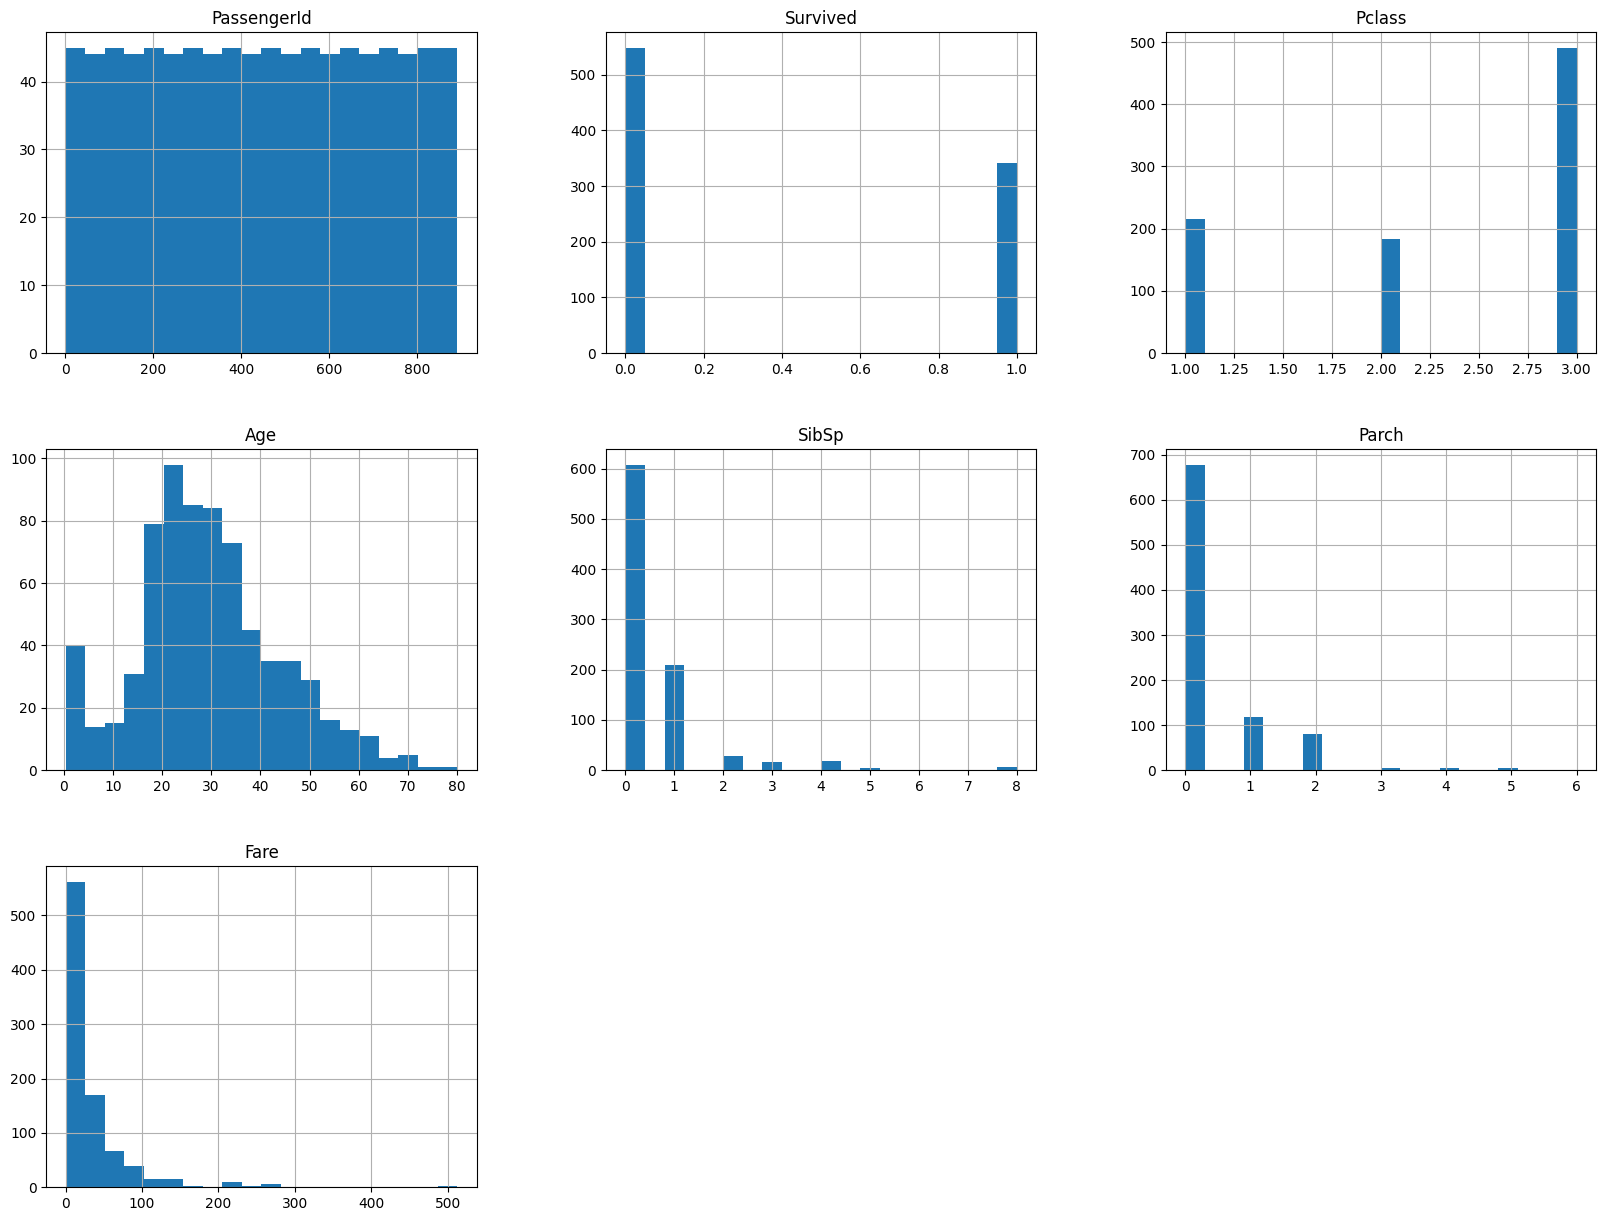

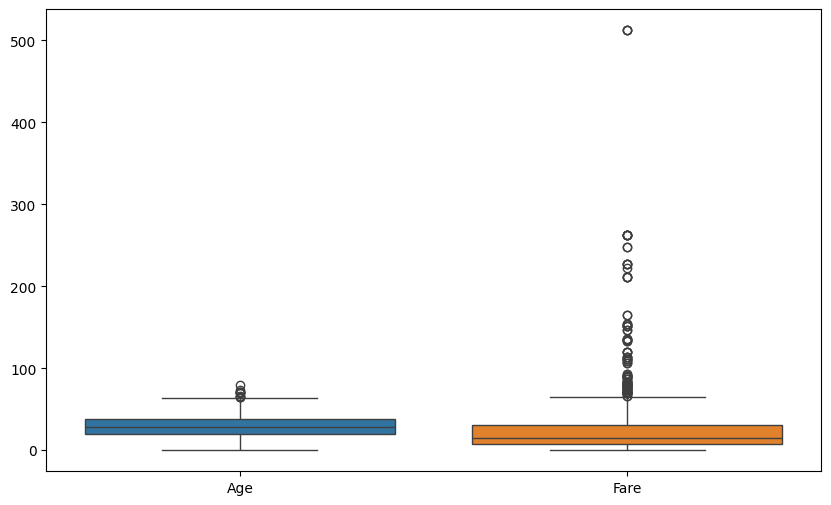

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots for continuous variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['Age', 'Fare']])
plt.show()


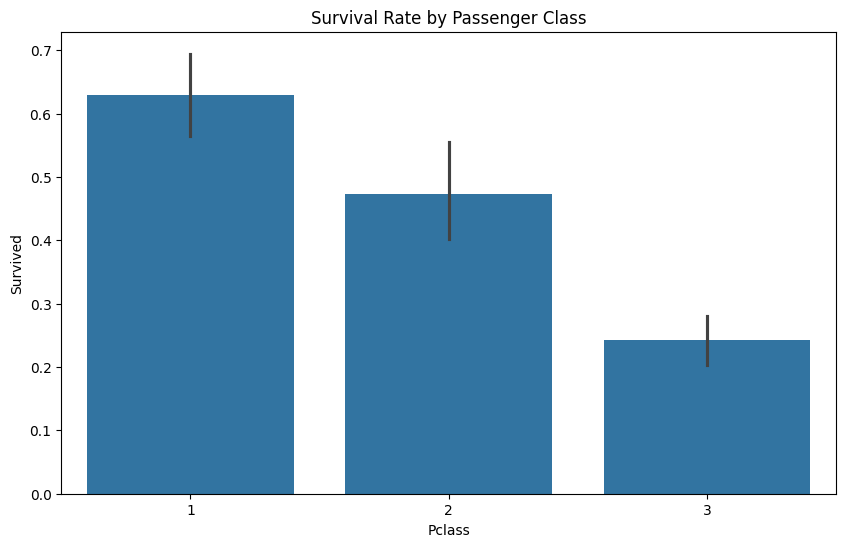

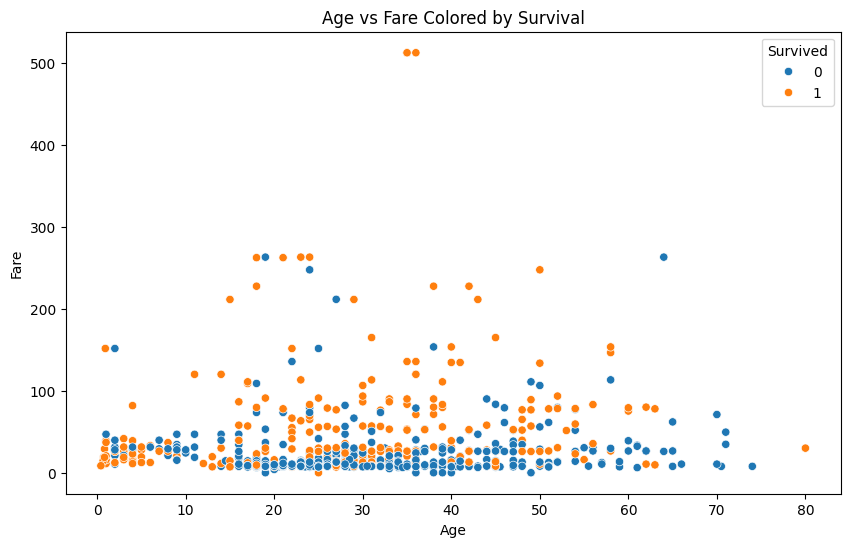

In [ ]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Scatter plot for continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare Colored by Survival')
plt.show()


In [ ]:
# Impute missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Impute missing Fare in the test set with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [ ]:
# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

lgb_metrics = evaluate_model(y_val, lgb_pred)
xgb_metrics = evaluate_model(y_val, xgb_pred)

print(f"LightGBM - Accuracy: {lgb_metrics[0]}, Precision: {lgb_metrics[1]}, Recall: {lgb_metrics[2]}, F1 Score: {lgb_metrics[3]}")
print(f"XGBoost - Accuracy: {xgb_metrics[0]}, Precision: {xgb_metrics[1]}, Recall: {xgb_metrics[2]}, F1 Score: {xgb_metrics[3]}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5, scoring='f1')
lgb_grid.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(XGBClassifier(), xgb_param_grid, cv=5, scoring='f1')
xgb_grid.fit(X_train, y_train)

print(f"Best parameters for LightGBM: {lgb_grid.best_params_}")
print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Use the best models found from GridSearchCV
lgb_best_model = lgb_grid.best_estimator_
xgb_best_model = xgb_grid.best_estimator_

lgb_best_pred = lgb_best_model.predict(X_val)
xgb_best_pred = xgb_best_model.predict(X_val)

lgb_best_metrics = evaluate_model(y_val, lgb_best_pred)
xgb_best_metrics = evaluate_model(y_val, xgb_best_pred)

print(f"Tuned LightGBM - Accuracy: {lgb_best_metrics[0]}, Precision: {lgb_best_metrics[1]}, Recall: {lgb_best_metrics[2]}, F1 Score: {lgb_best_metrics[3]}")
print(f"Tuned XGBoost - Accuracy: {xgb_best_metrics[0]}, Precision: {xgb_best_metrics[1]}, Recall: {xgb_best_metrics[2]}, F1 Score: {xgb_best_metrics[3]}")


Tuned LightGBM - Accuracy: 0.8212290502793296, Precision: 0.7916666666666666, Recall: 0.7702702702702703, F1 Score: 0.7808219178082192
Tuned XGBoost - Accuracy: 0.8044692737430168, Precision: 0.8, Recall: 0.7027027027027027, F1 Score: 0.7482014388489208
